In [ ]:
import pandas as pd

# Charger le fichier Excel
data = pd.read_csv('/content/drive/MyDrive/mémoire/Copie de 3_data_gis_num.xlsx - Feuille 1 (2).csv')


# Afficher les premières lignes pour examiner la structure des données
data.head()


,periode,site,"xcoord,N,24,15","ycoord,N,24,15",structure_num,proprétaire,structure_type,animal,animal_emp,animal_part,...,lapin_emp,lapin_part,elephant,elephant_emp,elephant_part,oiseaux,oiseaux_part,tortue,glire,total
0,NaN,Angang,12724561.0,4317460.0,2007M11,NaN,fosse_char_cheval,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,00"
1,NaN,Angang,12724561.0,4317460.0,2007M12,NaN,fosse_char_cheval,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,00"
2,NaN,Angang,12724561.0,4317460.0,2007M13,NaN,fosse_char_cheval,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,00"
3,NaN,Angang,12724561.0,4317460.0,2007M1,NaN,fosse_char_cheval,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,00"
4,NaN,Angang,12724561.0,4317460.0,2007M2,NaN,fosse_char_cheval,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,00"


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Sélectionner les colonnes de coordonnées géographiques
coordinates = data[['xcoord,N,24,15', 'ycoord,N,24,15']].dropna()

# Standardiser les données (important pour DBSCAN si les dimensions ont des échelles différentes)
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)

# Appliquer DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(coordinates_scaled)

# Ajouter les clusters à notre DataFrame original
data['cluster'] = np.nan
data.loc[coordinates.index, 'cluster'] = clusters

# Afficher les premiers résultats pour voir les clusters
data[['site', 'xcoord,N,24,15', 'ycoord,N,24,15', 'cluster']].head()


,site,"xcoord,N,24,15","ycoord,N,24,15",cluster
0,Angang,12724561.0,4317460.0,0.0
1,Angang,12724561.0,4317460.0,0.0
2,Angang,12724561.0,4317460.0,0.0
3,Angang,12724561.0,4317460.0,0.0
4,Angang,12724561.0,4317460.0,0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Tester avec des paramètres différents
dbscan1 = DBSCAN(eps=0.3, min_samples=3)
clusters1 = dbscan1.fit_predict(coordinates_scaled)
data['cluster_1'] = np.nan
data.loc[coordinates.index, 'cluster_1'] = clusters1

dbscan2 = DBSCAN(eps=0.7, min_samples=10)
clusters2 = dbscan2.fit_predict(coordinates_scaled)
data['cluster_2'] = np.nan
data.loc[coordinates.index, 'cluster_2'] = clusters2

# Comparer les résultats
print(data[['site', 'xcoord,N,24,15', 'ycoord,N,24,15', 'cluster_1', 'cluster_2']].head())


           site  xcoord,N,24,15  ycoord,N,24,15  cluster_1  cluster_2
0   Yinxu_ouest    1.272587e+07    4.317473e+06        0.0        0.0
1   Yinxu_ouest    1.272587e+07    4.317473e+06        0.0        0.0
2  Sanjiazhuang    1.272610e+07    4.320090e+06        1.0       -1.0
3  Sanjiazhuang    1.272610e+07    4.320090e+06        1.0       -1.0
4  Sanjiazhuang    1.272610e+07    4.320090e+06        1.0       -1.0


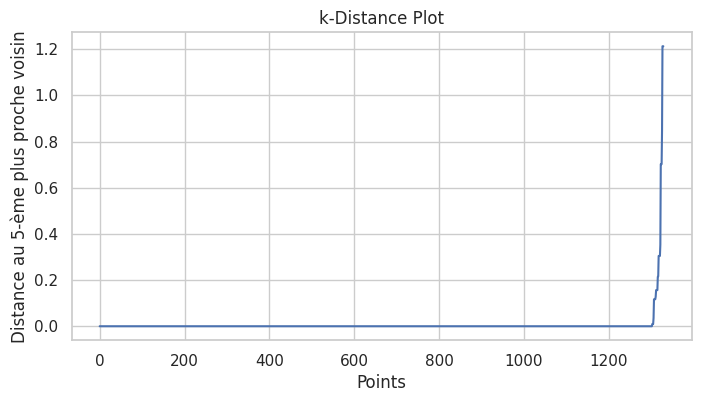

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# Supposez que 'coordinates' contient les colonnes de coordonnées géographiques
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)
# Spécifiez le nombre de voisins (min_samples pour DBSCAN)
min_samples = 5

# Initialisez l'algorithme NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(coordinates_scaled)

# Calculer les distances aux k-ièmes voisins et les indices
distances, indices = nbrs.kneighbors(coordinates_scaled)
# Trier les distances pour le k-ième voisin (k = min_samples)
distances = np.sort(distances[:, -1])
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title('k-Distance Plot')
plt.xlabel('Points')
plt.ylabel(f'Distance au {min_samples}-ème plus proche voisin')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sélection des colonnes intéressantes
data = data[['xcoord,N,24,15', 'ycoord,N,24,15', 'total', 'site']].dropna()

# Préparation du Pipeline pour encodage et normalisation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['xcoord,N,24,15', 'ycoord,N,24,15']),
        ('cat', OneHotEncoder(), ['total', 'site'])
    ])

# Appliquer DBSCAN
dbscan_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('dbscan', DBSCAN(eps=1, min_samples=30))])

# Ajuster le modèle aux données
clusters = dbscan_pipeline.fit_predict(data)

# Ajouter les clusters au DataFrame original
data['cluster'] = clusters

# Afficher les clusters obtenus
print(data[['xcoord,N,24,15', 'ycoord,N,24,15', 'total', 'site']])


      xcoord,N,24,15  ycoord,N,24,15 total         site
0         12724561.0       4317460.0  1,00       Angang
1         12724561.0       4317460.0  1,00       Angang
2         12724561.0       4317460.0  1,00       Angang
3         12724561.0       4317460.0  1,00       Angang
4         12724561.0       4317460.0  1,00       Angang
...              ...             ...   ...          ...
1327      12725870.0       4317472.0  2,00  Yinxu_ouest
1328      12725870.0       4317472.0  2,00  Yinxu_ouest
1329      12725870.0       4317472.0  2,00  Yinxu_ouest
1330      12725870.0       4317472.0  2,00  Yinxu_ouest
1331      12725870.0       4317472.0  2,00  Yinxu_ouest

[1330 rows x 4 columns]


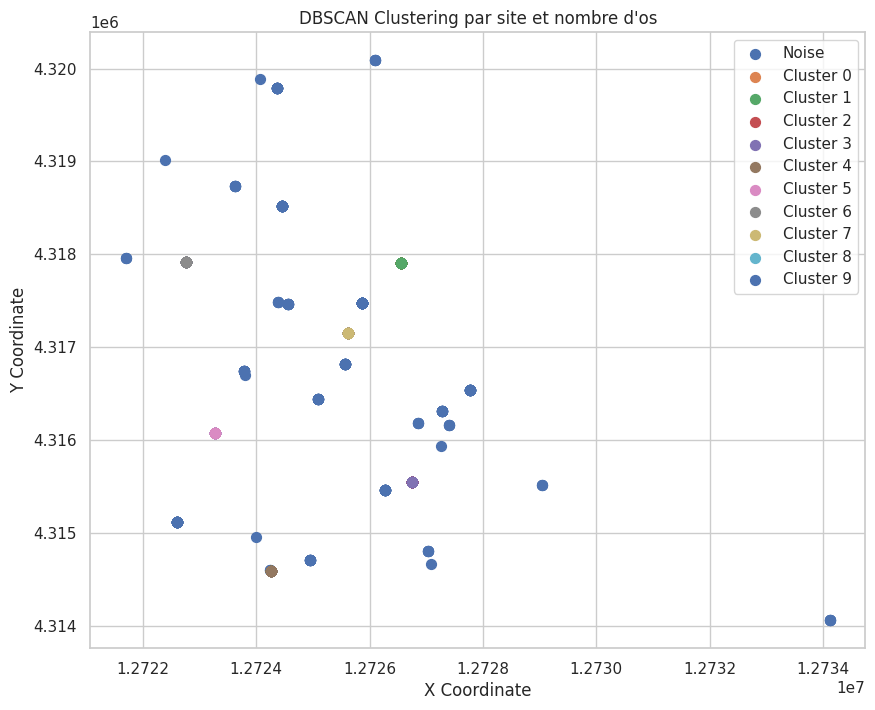

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les colonnes avec les clusters
coords = data[['xcoord,N,24,15', 'ycoord,N,24,15', 'cluster']]

# Créer la figure
plt.figure(figsize=(10, 8))

# Tracer les points avec les clusters en couleurs
unique_clusters = coords['cluster'].unique()
for cluster in unique_clusters:
    subset = coords[coords['cluster'] == cluster]
    plt.scatter(subset['xcoord,N,24,15'], subset['ycoord,N,24,15'],
                label=f'Cluster {int(cluster)}' if cluster != -1 else 'Noise', s=50)

# Ajouter des titres et légendes
plt.title("DBSCAN Clustering par site et nombre d'os")
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()


In [ ]:
# Filtrer les données du cluster rouge (Cluster 0)
f0 = data[data['cluster'] == 0]
f1 = data[data['cluster'] == 1]
f2 = data[data['cluster'] == 2]
f3 = data[data['cluster'] == 3]


# Afficher les informations sur la période pour ce cluster
print(f0[['periode']].value_counts())
print(f1[['periode']].value_counts())
print(f2[['periode']].value_counts())
print(f3[['periode']].value_counts())


periode
4,00       270
Name: count, dtype: int64
periode
2,00       76
Name: count, dtype: int64
periode
3,00       130
Name: count, dtype: int64
periode
4,00       59
Name: count, dtype: int64


In [ ]:
# Lister les attributs pour chaque cluster
cluster_summary = data.groupby('cluster').agg({
    'site': pd.Series.mode,           # La période la plus fréquente dans chaque cluster

    'total': 'sum'                       # Total des animaux ou autres attributs d'intérêt
}).reset_index()

print(cluster_summary)


    cluster           site                                              total
0        -1    Qijiazhuang  1,001,001,001,001,001,001,001,001,001,001,001,...
1         0       Dasikong  1,001,001,001,001,001,001,001,001,001,001,001,...
2         1       Dasikong  2,002,002,002,002,002,002,002,002,002,002,002,...
3         2   Guojiazhuang  1,001,001,001,001,001,001,001,001,001,001,001,...
4         3   Guojiazhuang  2,002,002,002,002,002,002,002,002,002,002,002,...
5         4   Liujiazhuang  1,001,001,001,001,001,001,001,001,001,001,001,...
6         5  Meiyuanzhuang  1,001,001,001,001,001,001,001,001,001,001,001,...
7         6     Xiaomintun  1,001,001,001,001,001,001,001,001,001,001,001,...
8         7        Xiaotun  1,001,001,001,001,001,001,001,001,001,001,001,...
9         8    Yinxu_ouest  1,001,001,001,001,001,001,001,001,001,001,001,...
10        9    Yinxu_ouest  2,002,002,002,002,002,002,002,002,002,002,002,...
